<a href="https://colab.research.google.com/github/steffiangel/Predictive-Analytics/blob/main/PA_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Online Retail (2).csv")

Q1. Data Cleaning and Preparation


Q1.1: Clean the dataset by handling missing values, removing duplicates, and filtering
any irrelevant data (e.g., negative quantities).


Q1.2: Summarize the dataset by providing descriptive statistics (e.g., mean, median,
standard deviation) for relevant columns like Quantity, UnitPrice, and
InvoiceDate.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:

df.dropna(inplace=True)


print("Shape of the dataframe after dropping rows with missing values:", df.shape)


Shape of the dataframe after dropping rows with missing values: (406829, 8)


In [ ]:
df.duplicated().sum()

5225

In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)

(401604, 8)


In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
df[['Quantity', 'UnitPrice', 'InvoiceDate']].describe()


,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [ ]:
descriptive_stats = df[['Quantity', 'UnitPrice']].describe()
print('Descriptive Statistics:',descriptive_stats)

Descriptive Statistics:             Quantity      UnitPrice
count  392732.000000  392732.000000
mean       13.153718       3.125596
std       181.588420      22.240725
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


INFERENCE:

The Online Retail Dataset from the UCI Machine Learning
Repository contains transactional data for a UK-based and registered
online retail store. The company mainly sells unique all-occasion gifts.
The dataset contians missing values in the attributes of description and customer id and 5225 duplicated entries which were removed to avoid skewedness in analysis. The exsiting missing entries of product descrpition and customer id depict security concerns and must be monitored or attended to.

the negative value transcations were handled and statistical description of quantity and unit price were examined.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Q2. Sales Analysis


Q2.1: What are the top 10 best-selling products by quantity?


Q2.2: What is the total revenue generated by each product? (Hint: Use Quantity *
UnitPrice to calculate total sales).


Q2.3: What is the monthly revenue trend? Are there noticeable patterns or peaks in
sales over time?

<ipython-input-43-461fe091bfb7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="viridis")


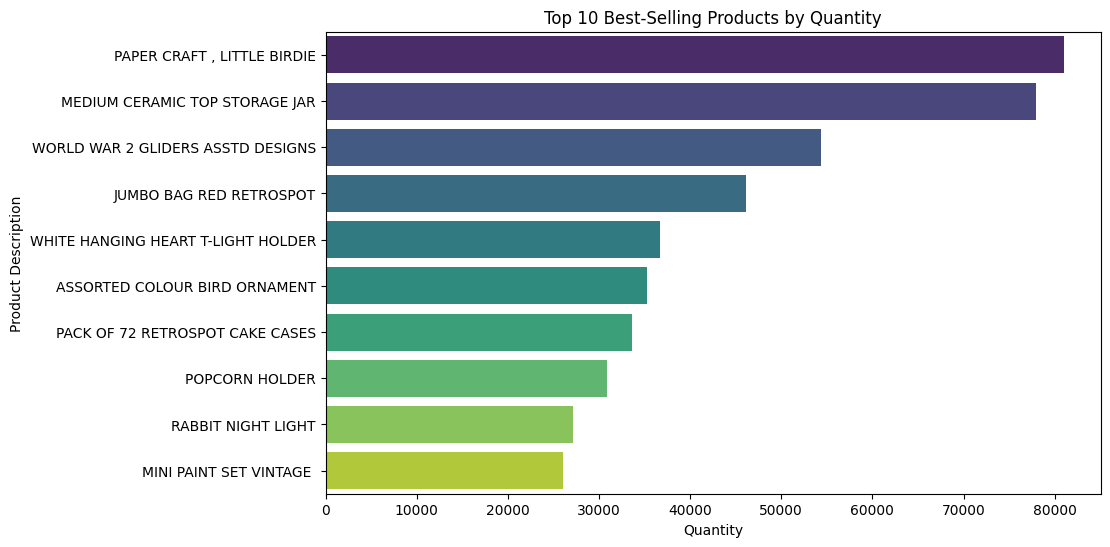

In [ ]:

top_10_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="viridis")
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.show()


<ipython-input-47-6f4ac664e6c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_revenue_per_product11.values, y=total_revenue_per_product11.index, palette="viridis")


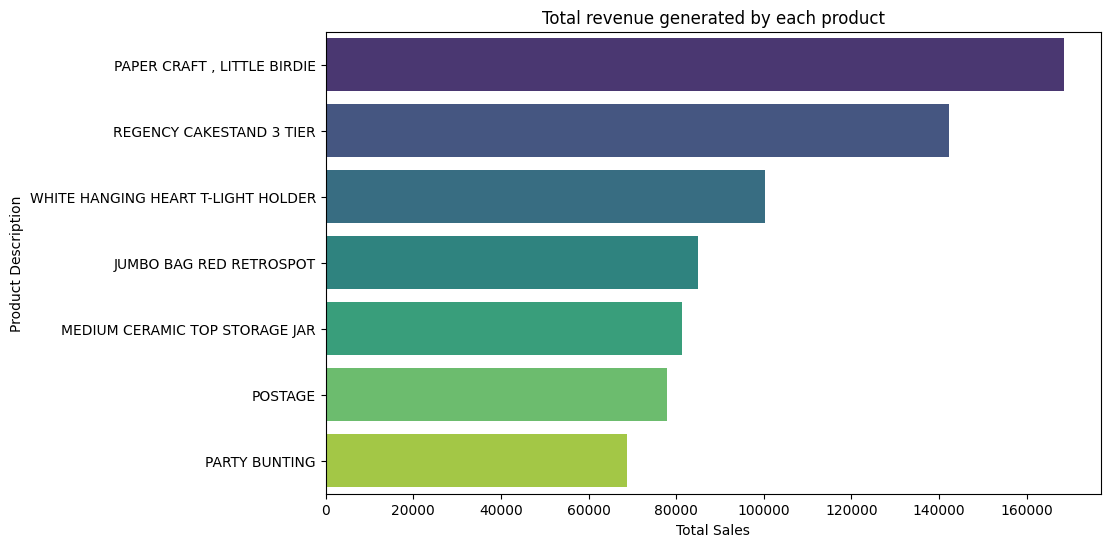

In [ ]:

 Total revenue generated by each product
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
total_revenue_per_product = df.groupby('Description')['TotalSales'].sum()
total_revenue_per_product11 = total_revenue_per_product.nlargest(7)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_revenue_per_product11.values, y=total_revenue_per_product11.index, palette="viridis")
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.title('Total revenue generated by each product')
plt.show()



INFERENCE: The top best selling products by quantity are PAPER CRAFT, LITTLE BIRDIE and MEDIUM CERAMIC TOP STORAGE JAR with over 70000 quantity sale gaining over 140000 to 160000 revenue.

We could observe from the Monthly Sales Trend that during the month of aug-december in the season of sales the no. of purchase tend to kepp increasing. Hence bringing in new products to create a brand to create the desire for a customer to purchase old as well as new products in the market should be advisable.

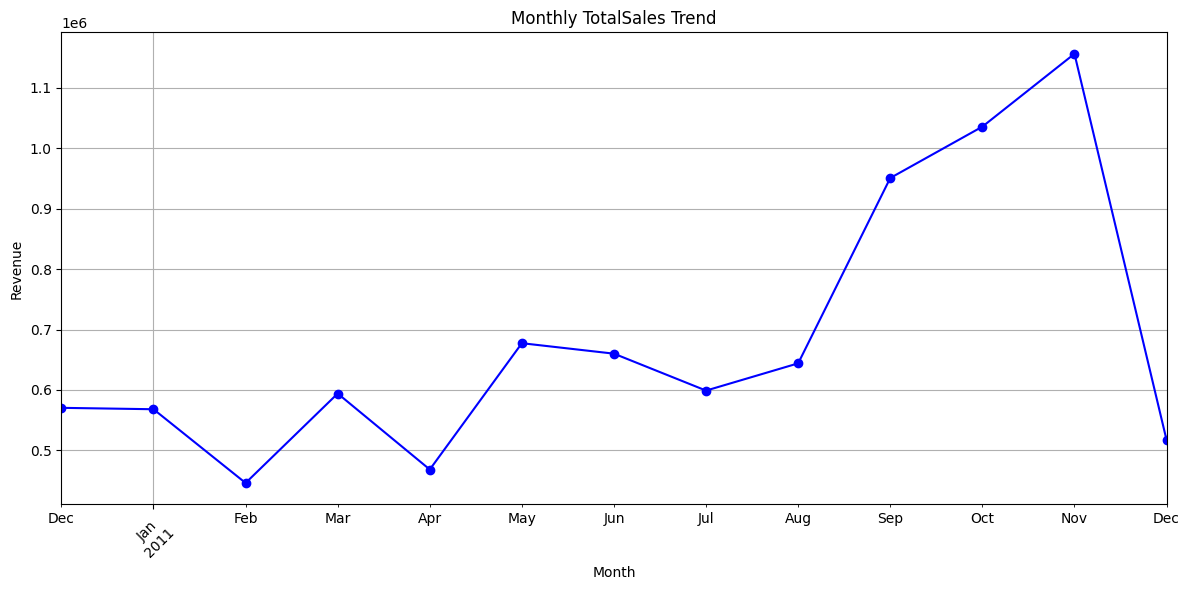

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


monthly_revenue = df.groupby('YearMonth')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='b')
plt.title('Monthly TotalSales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q3. Customer Behaviour


Q3.1: How many unique customers are there in the dataset? What percentage of sales
is driven by repeat customers?


Q3.2: What is the average order value (total sales per invoice)? How does this vary
across different customer segments (e.g., country-wise)?


Q3.3: Which countries contribute the most to sales revenue?

In [ ]:
# Count unique customers
unique_customers = df['CustomerID'].nunique()

# Identify repeat customers
repeat_customers = df[df.duplicated(subset='CustomerID', keep=False)]
repeat_sales = repeat_customers['TotalSales'].sum()
total_sales = df['TotalSales'].sum()
repeat_customer_percentage = (repeat_sales / total_sales) * 100

print(f"Unique Customers: {unique_customers}")
print(f"Percentage of Sales Driven by Repeat Customers: {repeat_customer_percentage:.2f}%")


Unique Customers: 4339
Percentage of Sales Driven by Repeat Customers: 98.90%


In [ ]:

invoice_sales = df.groupby('InvoiceNo')['TotalSales'].sum()
average_order_value = invoice_sales.mean()
country_order_value = df.groupby('Country').apply(lambda x: x.groupby('InvoiceNo')['TotalSales'].sum().mean())
print(f"Average order value: {average_order_value:.2f}")


print("Average order value by country:")
print(country_order_value)


Average order value: 479.46
Average order value by country:
Country
Australia               2429.014211
Austria                  599.922353
Bahrain                  274.200000
Belgium                  420.370816
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          786.174615
Cyprus                   843.928125
Czech Republic           413.370000
Denmark                 1053.074444
EIRE                    1020.240231
European Community       325.062500
Finland                  549.904390
France                   537.106195
Germany                  500.390372
Greece                   952.104000
Iceland                  615.714286
Israel                  1443.168000
Italy                    460.085263
Japan                   1969.282632
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    545.118000
Netherlands             3004.698316
Norway                  1004.595556
Poland                   386.034

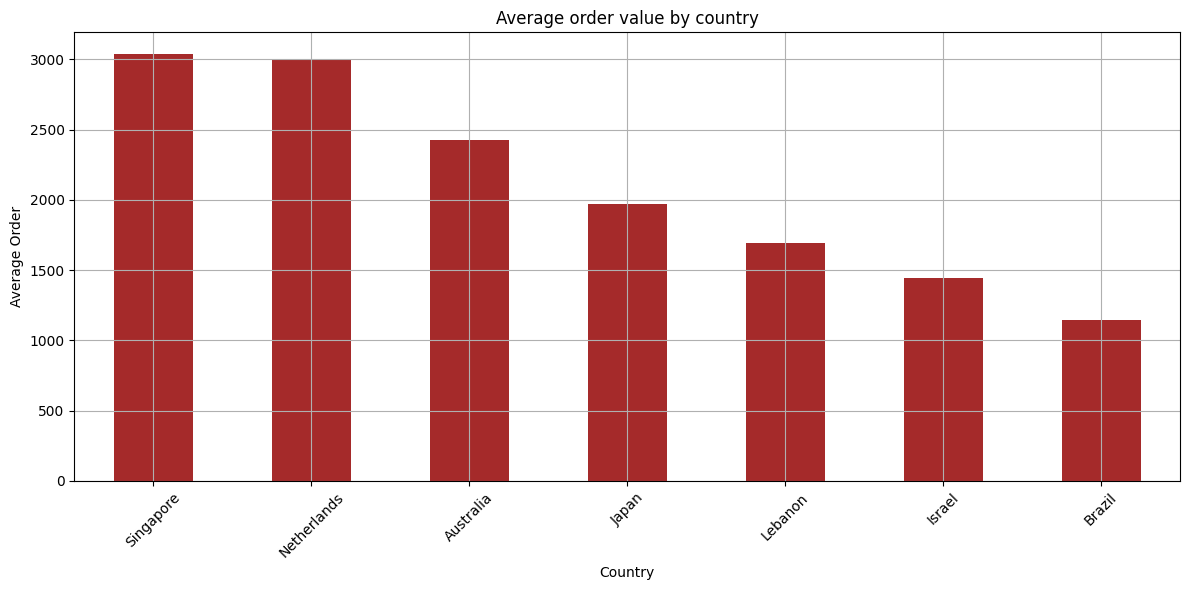

In [ ]:
country_order_value11 = country_order_value.nlargest(7)
plt.figure(figsize=(12, 6))
country_order_value11.plot(kind='bar',  color='brown')
plt.title('Average order value by country')
plt.xlabel('Country')
plt.ylabel('Average Order')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total sales revenue by country
country_revenue = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

print("Countries contributing the most to sales revenue:")
print(country_revenue)


Countries contributing the most to sales revenue:
Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta 

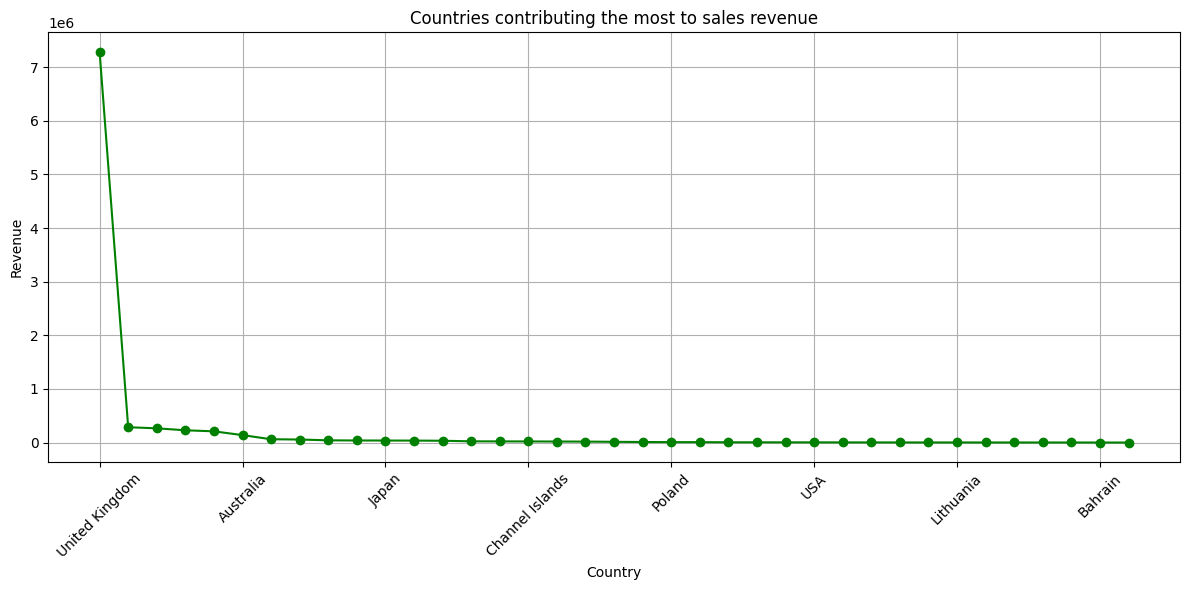

In [ ]:
country_revenue11 = country_revenue.nlargest(7)
plt.figure(figsize=(12, 6))
country_revenue.plot(kind='line', marker='o', color='green')
plt.title('Countries contributing the most to sales revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INFERENCE:
The no. of unique customers are 4339. The Percentage of Sales Driven by Repeat Customers: 98.90%. The average order value of singapore and Netherlands are over 3000 and the rest of the countries suffer from a massive decrease by over 500. United Kingdom seem to contribute to the most sales revenue.

Q4. Product Performance


1: What are the top 5 countries with the highest average revenue per transaction?


2: Investigate if there are any specific months or seasons when certain products
perform particularly well.

<ipython-input-71-3532cc5f8dbd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_revenue_per_country.values, y=average_revenue_per_country.index, palette="muted")


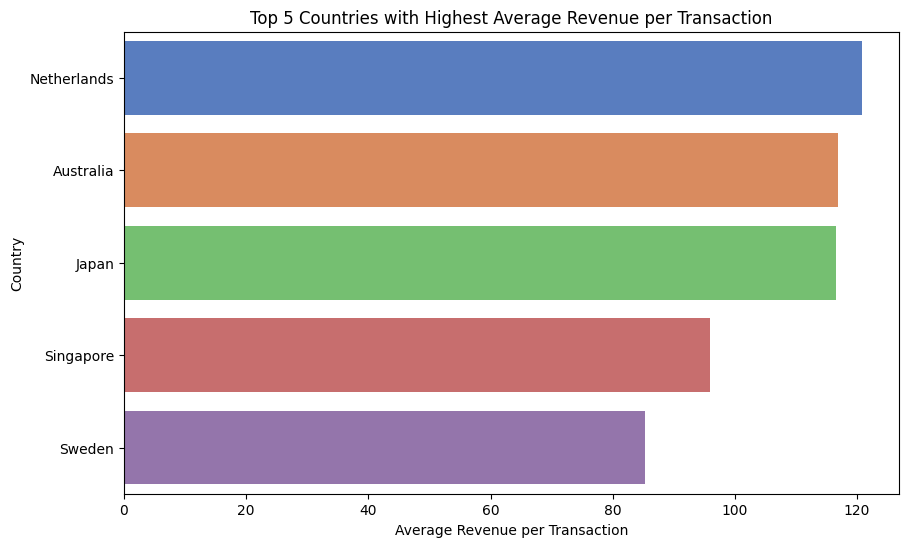

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

average_revenue_per_country = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False).head(5)


plt.figure(figsize=(10, 6))
sns.barplot(x=average_revenue_per_country.values, y=average_revenue_per_country.index, palette="muted")
plt.xlabel('Average Revenue per Transaction')
plt.ylabel('Country')
plt.title('Top 5 Countries with Highest Average Revenue per Transaction')
plt.show()


<Figure size 1200x800 with 0 Axes>

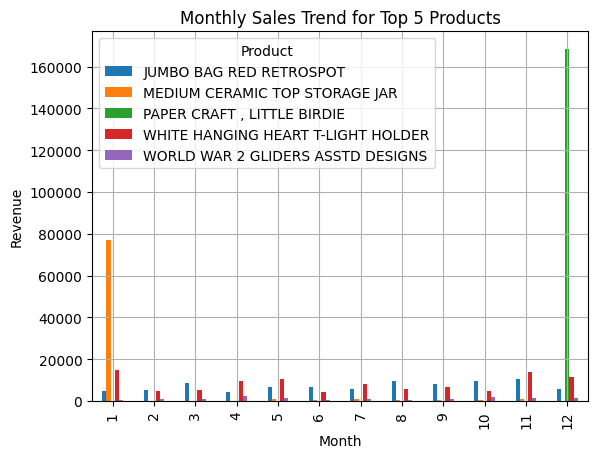

In [ ]:

df['Month'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M').dt.month

top_5_products = top_10_products.head(5).index
monthly_product_sales = df[df['Description'].isin(top_5_products)].groupby(['Month', 'Description'])['TotalSales'].sum().unstack()

plt.figure(figsize=(12, 8))
monthly_product_sales.plot(kind='bar')
plt.title('Monthly Sales Trend for Top 5 Products')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend(title='Product')
plt.show()


INFERENCE:
Top 5 Countries with Highest Average Revenue per Transaction are Netherland, australia, sweden, japan and singapore. From the Monthly Sales Trend for Top 5 Products, the LITTLE BIRDIE by PAPER CRAFT have highest sales in december and Medium CREAmic Top Storage Jar has highest sale in january whereas the white hanging heart t-light holder has sales throughout the year but most in november